In [35]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y=[100,60,50,60,55,60,65,70,70,70,75,76,78,90,99,99,100]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

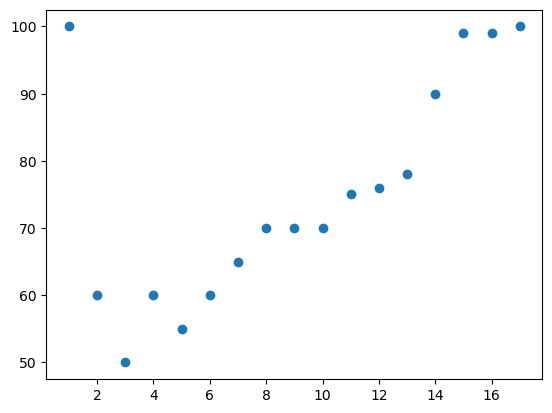

In [4]:
plt.scatter(x ,y)

In [23]:
np.polyfit([1,3],[6,2] ,2)

C:\Users\tejas\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([-0.49230769, -0.03076923,  6.52307692])

In [16]:
y_pred=np.poly1d(np.polyfit(x,y,3))

In [17]:
line =np.linspace(1,17)

In [18]:
model=y_pred(line)

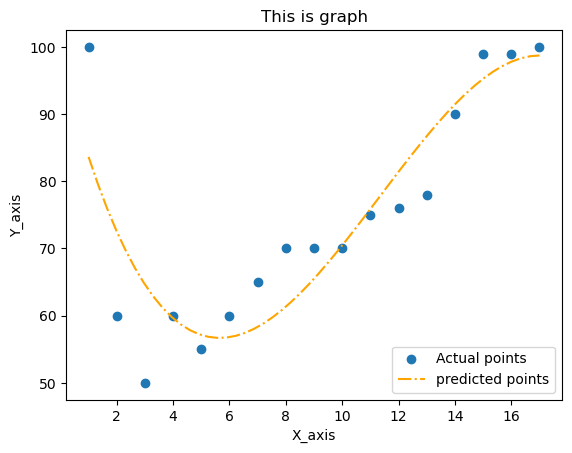

In [29]:
plt.scatter(x ,y , label="Actual points")
plt.plot(line,model, "-." , color="orange" , label="predicted points")
plt.xlabel("X_axis")
plt.ylabel("Y_axis")
plt.title("This is graph")
plt.legend()

In [33]:
y_predict = y_pred(x)

In [31]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y , y_predict)

0.7962534595942268

## Using polynomial features

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y=[100,60,50,60,55,60,65,70,70,70,75,76,78,90,99,99,100]

In [11]:
s1 = pd.Series(x , name="Time")
s2 = pd.Series(y , name="Speed")



In [12]:
df= pd.concat([s1,s2] , axis=1)

In [13]:
df

,Time,Speed
0,1,100
1,2,60
2,3,50
3,4,60
4,5,55
5,6,60
6,7,65
7,8,70
8,9,70
9,10,70


In [14]:
from sklearn.preprocessing  import PolynomialFeatures

In [15]:
pf =PolynomialFeatures(degree =2)

In [16]:
x1 =pf.fit_transform(df[["Time"]] , df["Speed"])
x1

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x1 , df.Speed)

LinearRegression()

In [30]:
coef = model.coef_
coef

array([ 0.        , -5.06953044,  0.40105779])

In [31]:
intercept = model.intercept_
intercept

78.63235294117646

### we want continous line to plot a line 

In [32]:
line = np.linspace(1,17)

### we use polynomial equation on the continous point to get a curve 

In [33]:
y_pred = intercept + coef[1]*line + coef[2]*line**2 

In [34]:
y_pred

array([ 73.96388029,  72.61320038,  71.34804384,  70.16841065,
        69.07430083,  68.06571436,  67.14265126,  66.30511152,
        65.55309514,  64.88660212,  64.30563246,  63.81018616,
        63.40026322,  63.07586364,  62.83698743,  62.68363457,
        62.61580508,  62.63349894,  62.73671617,  62.92545676,
        63.1997207 ,  63.55950801,  64.00481868,  64.53565271,
        65.15201011,  65.85389086,  66.64129497,  67.51422245,
        68.47267328,  69.51664748,  70.64614503,  71.86116595,
        73.16171023,  74.54777787,  76.01936886,  77.57648322,
        79.21912095,  80.94728203,  82.76096647,  84.66017427,
        86.64490544,  88.71515996,  90.87093785,  93.1122391 ,
        95.4390637 ,  97.85141167, 100.349283  , 102.93267769,
       105.60159574, 108.35603715])

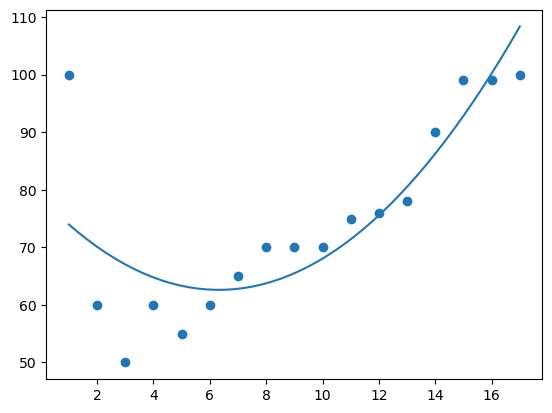

In [36]:
plt.scatter(df["Time"], df["Speed"])
plt.plot(line , y_pred )
plt.show()

## follow we find the y_predict using the x1 sample


we want to calculate the r2_socre it required y-true , y-predict.

so To find y-predict below where we use x1 values we get from the polyfit and uses


it x1 = x[:, 1] >> mean all value of col index 1 
and x2 = x[: , 2] >> all value of col index 2 and put it in formula we get y-predict 


In [48]:
y_predicted =intercept + coef[1]*x1[: ,1] + coef[2]*x1[:,2]

In [53]:
from sklearn.metrics import r2_score


In [54]:
r2_score(df.Speed , y_predicted)

0.6941870811317734

In [57]:
model.score(x1 , df.Speed)

0.6941870811317734

# Multiple linear regression practice 

In [59]:
df =pd.read_csv("data.csv")

In [61]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [62]:
x=df[["Volume","Weight"]]

In [80]:
df["Volume"].max()

2500

In [63]:
x 1000 - 900 / 2500 - 900 = 1 /16 = 0.0c

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140
5,1000,929
6,1400,1109
7,1500,1365
8,1500,1112
9,1600,1150


In [64]:
y=df["CO2"]

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model =LinearRegression()

In [68]:
model.fit(x , y)

LinearRegression()

In [69]:
model.predict(x)

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

In [70]:
model.score(x,y)

0.3765564043619989

### MinMaxScaler uses Normalization Scaling 

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scale = MinMaxScaler()

In [77]:
x1 =scale.fit_transform(x)
x1

array([[0.0625    , 0.        ],
       [0.1875    , 0.38702929],
       [0.0625    , 0.14539749],
       [0.        , 0.07845188],
       [0.375     , 0.36610879],
       [0.0625    , 0.14539749],
       [0.3125    , 0.33368201],
       [0.375     , 0.60146444],
       [0.375     , 0.33682008],
       [0.4375    , 0.37656904],
       [0.125     , 0.19874477],
       [0.25      , 0.20920502],
       [0.0625    , 0.33682008],
       [0.4375    , 0.4832636 ],
       [0.4375    , 0.56066946],
       [0.4375    , 0.56485356],
       [0.4375    , 0.60146444],
       [0.8125    , 0.5125523 ],
       [0.4375    , 0.34414226],
       [0.6875    , 0.56276151],
       [0.4375    , 0.83054393],
       [0.6875    , 0.66736402],
       [0.75      , 0.60146444],
       [0.4375    , 0.65376569],
       [0.6875    , 0.65376569],
       [0.375     , 0.70606695],
       [0.6875    , 0.73221757],
       [0.6875    , 0.97803347],
       [0.4375    , 0.7667364 ],
       [0.6875    , 0.95711297],
       [0.

In [75]:
model.fit(x1 , y)

LinearRegression()

In [76]:
model.score(x1,y)

0.3765564043619988

## Linear project revision 

In [235]:
df =pd.read_csv("car_data.csv")

In [236]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [237]:
df.shape

(301, 9)

In [238]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [239]:
df.drop(["Car_Name","Present_Price"] , axis=1 , inplace=True)

In [240]:
df

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,Petrol,Dealer,Manual,0
1,2013,4.75,43000,Diesel,Dealer,Manual,0
2,2017,7.25,6900,Petrol,Dealer,Manual,0
3,2011,2.85,5200,Petrol,Dealer,Manual,0
4,2014,4.60,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,9.50,33988,Diesel,Dealer,Manual,0
297,2015,4.00,60000,Petrol,Dealer,Manual,0
298,2009,3.35,87934,Petrol,Dealer,Manual,0
299,2017,11.50,9000,Diesel,Dealer,Manual,0


In [241]:
y = df["Selling_Price"]

In [242]:
from datetime import datetime

In [243]:
current_time = datetime.now()

In [244]:
current_time

datetime.datetime(2023, 11, 20, 22, 51, 27, 75993)

In [245]:
year = current_time.year

In [246]:
year

2023

In [247]:
df["Year"] =  year - df["Year"]

In [248]:
df

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,27000,Petrol,Dealer,Manual,0
1,10,4.75,43000,Diesel,Dealer,Manual,0
2,6,7.25,6900,Petrol,Dealer,Manual,0
3,12,2.85,5200,Petrol,Dealer,Manual,0
4,9,4.60,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,7,9.50,33988,Diesel,Dealer,Manual,0
297,8,4.00,60000,Petrol,Dealer,Manual,0
298,14,3.35,87934,Petrol,Dealer,Manual,0
299,6,11.50,9000,Diesel,Dealer,Manual,0


In [249]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [250]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [251]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [252]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [253]:
df =pd.get_dummies(df, columns=["Fuel_Type" , "Seller_Type" ,"Transmission" ] , drop_first=True)

In [254]:
df

,Year,Selling_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,27000,0,0,1,0,1
1,10,4.75,43000,0,1,0,0,1
2,6,7.25,6900,0,0,1,0,1
3,12,2.85,5200,0,0,1,0,1
4,9,4.60,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,7,9.50,33988,0,1,0,0,1
297,8,4.00,60000,0,0,1,0,1
298,14,3.35,87934,0,0,1,0,1
299,6,11.50,9000,0,1,0,0,1


In [255]:
from sklearn.preprocessing import MinMaxScaler

In [256]:
scale = MinMaxScaler()

In [257]:
df[["Year" ,"Kms_Driven" , "Owner"]] =scale.fit_transform(df[["Year" ,"Kms_Driven" , "Owner"]])

In [258]:
df

,Year,Selling_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.266667,3.35,0.053053,0.0,0,1,0,1
1,0.333333,4.75,0.085085,0.0,1,0,0,1
2,0.066667,7.25,0.012813,0.0,0,1,0,1
3,0.466667,2.85,0.009409,0.0,0,1,0,1
4,0.266667,4.60,0.083984,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,0.133333,9.50,0.067043,0.0,1,0,0,1
297,0.200000,4.00,0.119119,0.0,0,1,0,1
298,0.600000,3.35,0.175043,0.0,0,1,0,1
299,0.066667,11.50,0.017017,0.0,1,0,0,1


In [259]:
y 

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [260]:
x = df.drop("Selling_Price", axis=1)

In [261]:
x

,Year,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.266667,0.053053,0.0,0,1,0,1
1,0.333333,0.085085,0.0,1,0,0,1
2,0.066667,0.012813,0.0,0,1,0,1
3,0.466667,0.009409,0.0,0,1,0,1
4,0.266667,0.083984,0.0,1,0,0,1
...,...,...,...,...,...,...,...
296,0.133333,0.067043,0.0,1,0,0,1
297,0.200000,0.119119,0.0,0,1,0,1
298,0.600000,0.175043,0.0,0,1,0,1
299,0.066667,0.017017,0.0,1,0,0,1


In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
model =LinearRegression()

In [264]:
model.fit(x , y)

LinearRegression()

In [265]:
model.score(x,y)

0.5816549394812498

In [266]:
from sklearn.model_selection import train_test_split

In [270]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [271]:
model.fit(X_train , y_train)

LinearRegression()

In [272]:
model.score(X_test , y_test)

0.6277335827814441